# Video Game Platform - Bar Chart Race

Bar Chart Race visualizations are a captivating way to observe and compare change over time. In researching how to create these visualizations in Python, I discovered that they could be created both directly through code or via a libarary, appropriately named 'bar_chart_race'. Inspired by Ted Patrou, Founder of Dunder Data, I was determined to create my own bar chart race. The aim of this project is to visualize the changing video game market using the "Video Game Sales" dataset by manipulating and preparing data for a variety of bar chart races which compare pertinent relationships. This notebook contains Part I of the project, where I explore using Ted Patrou's python library. Part II will explore a fully coded solution that emulates the library using Matplotlib animation functions.

## Dataset

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

This project will be to create a barchart race by platform and manufacturer using the pandas library and coded from scratch.

In [1]:
# %load_ext nb_black
%reload_ext nb_black

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

sns.set_style("whitegrid")
sns.set_palette("colorblind")

import bar_chart_race as bcr

<IPython.core.display.Javascript object>

In [2]:
video_game_data=pd.read_csv('vgsales.csv')
vgd=video_game_data.copy()

<IPython.core.display.Javascript object>

In [3]:
vgd.shape

(16598, 11)

<IPython.core.display.Javascript object>

In [4]:
vgd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<IPython.core.display.Javascript object>

In [5]:
vgd.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<IPython.core.display.Javascript object>

In [6]:
columns=vgd.columns.tolist()
columns

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

<IPython.core.display.Javascript object>

In [7]:
vgd.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# percentage of values missing
vgd.isna().sum().sum()/vgd.size*100

0.18019695691704368

<IPython.core.display.Javascript object>

#### Observation
* 0.18% of the data has missing values. It is safe to remove these missing data points. Although most of the unknown values in `Publisher` can be researched and filled in, for the sake of this project it is an unnecessary step.

In [9]:
vgd_missing_rows= vgd.loc[vgd.isna().any(axis=1)]
vgd_missing_rows.sort_values(by='Global_Sales', ascending=False).head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


<IPython.core.display.Javascript object>

#### Observation

It is reasonable to assume the date for Sports 'Genre', as many have the year in their title. Sports will be researched up to a quarter million in sales. The rest we can research if sales are above 1 million USD.

In [10]:
# missing years in sports genre
vgd_missing_rows.groupby('Genre').get_group('Sports')[:20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
2484,2486,Madden NFL 07,PSP,NaN,Sports,Unknown,0.77,0.03,0.00,0.04,0.83
2497,2499,MLB SlugFest 20-03,PS2,NaN,Sports,Unknown,0.41,0.32,0.00,0.11,0.83
2528,2530,Shaun White Snowboarding,X360,NaN,Sports,Ubisoft,0.48,0.26,0.00,0.08,0.82
2586,2588,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,Konami Digital Entertainment,0.04,0.33,0.26,0.17,0.80
2776,2778,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.00,0.05,0.74
3421,3423,Madden NFL 06,X360,NaN,Sports,Electronic Arts,0.54,0.00,0.01,0.03,0.59
3501,3503,Madden NFL 2002,XB,NaN,Sports,Unknown,0.53,0.02,0.00,0.03,0.58


<IPython.core.display.Javascript object>

In [11]:
vgd['Year'][179]=2004
vgd['Year'][377]=2004
vgd['Year'][1303]=1999
vgd['Year'][2484]=2007
vgd['Year'][2497]=2003
vgd['Year'][2528]=2008
vgd['Year'][2586]=2009
vgd['Year'][2776]=2011
vgd['Year'][3421]=2006
vgd['Year'][3501]=2002
vgd['Year'][3753]=2003
vgd['Year'][3880]=1980
vgd['Year'][4199]=2007
vgd['Year'][4536]=2010
vgd['Year'][4797]=2003
vgd['Year'][5162]=2003
vgd['Year'][5669]=2005
vgd['Year'][5901]=2003
vgd['Year'][6496]=2011
vgd['Year'][6647]=2006

<IPython.core.display.Javascript object>

In [12]:
vgd.iloc[6647]

Rank                         6649
Name            College Hoops 2K6
Platform                      PS2
Year                       2006.0
Genre                      Sports
Publisher                 Unknown
NA_Sales                     0.12
EU_Sales                      0.1
JP_Sales                      0.0
Other_Sales                  0.03
Global_Sales                 0.25
Name: 6647, dtype: object

<IPython.core.display.Javascript object>

In [13]:
# missing years with sales greater than 1 million
vgd_missing_rows = vgd.loc[vgd.isna().any(axis=1)]
vgd_missing_rows.sort_values(by='Global_Sales', ascending=False).head(21)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.0,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.0,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.0,0.20,2.11
1126,1128,Call of Duty: Black Ops,PC,NaN,Shooter,Activision,0.58,0.81,0.0,0.24,1.63
1133,1135,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.0,0.22,1.62


<IPython.core.display.Javascript object>

In [14]:
vgd['Year'][431]=2008
vgd['Year'][470]=2006
vgd['Year'][607]=1980
vgd['Year'][624]=2007
vgd['Year'][649]=2001
vgd['Year'][652]=2008
vgd['Year'][711]=2006
vgd['Year'][782]=2007
vgd['Year'][1126]=2010
vgd['Year'][1133]=2007
vgd['Year'][1433]=2011
vgd['Year'][1498]=2008
vgd['Year'][1513]=1980
vgd['Year'][1585]=1980
vgd['Year'][1649]=2003
vgd['Year'][1697]=2002
vgd['Year'][1837]=2007
vgd['Year'][1990]=1999
vgd['Year'][2019]=1997
# vgd['Year'][_]=_
# vgd['Year'][_]=_
# vgd['Year'][_]=_
# vgd['Year'][_]=_
# vgd['Year'][_]=_

<IPython.core.display.Javascript object>

#### Observation
`Publisher` as "Unknown" will not provide useful information about which publishers and game genres are the most profitable.

In [15]:
unknown_publishers=vgd[vgd['Publisher']=='Unknown']
unknown_publishers.count()

Rank            203
Name            203
Platform        203
Year            109
Genre           203
Publisher       203
NA_Sales        203
EU_Sales        203
JP_Sales        203
Other_Sales     203
Global_Sales    203
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
unknown_publishers.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1649,1651,NASCAR Thunder 2003,PS2,2003.0,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,Unknown,0.67,0.25,0.00,0.02,0.93


<IPython.core.display.Javascript object>

In [17]:
unknown_global_sales=unknown_publishers['Global_Sales'].sum()
ugs=unknown_global_sales

total_global_sales=vgd['Global_Sales'].sum()
tgs=total_global_sales

print(f"The unknown publisher games account for ${ugs} million in sales out of the ${round(tgs/1000, 2)} billion in total sales, accounting for only {round(ugs/tgs*100, 2)}% of all sales.")

The unknown publisher games account for $34.66 million in sales out of the $8.92 billion in total sales, accounting for only 0.39% of all sales.


<IPython.core.display.Javascript object>

#### Observation
Unkown publishers tend to be in the higher indexes, indicating it is mostly less-known titles with fewer sales. We can assume these are independent developers, and the removal of these 203 observations along with those with missing values will not affect the dataset in an appreciable way.

In [18]:
vgd.isna().sum()

Rank              0
Name              0
Platform          0
Year            232
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<IPython.core.display.Javascript object>

### Feature Engineering - Adding Manufacturer and Platform Type

* Manufacturer - Company that manufactures the platform of the title
* Platform Type - Mobile/Hand-held or Console

I decided to consider 'PC' - personal computers - to be manufactured by Microsoft, as Windows OS is the predominant operating system among PC users. Although Microsoft did not manufacturer the hardware, it did benefit from PC gamer ownership, therefore Microsoft is attributed to being the manufacturer by proxy. Additionally, for simplicity, 'PC' were attributed to the categroy of 'Console' as the designation indicates an immoble devices, rather than a 'Portable' one. 

In [19]:
# adds a new column for manufacturers of platforms
platform_list=vgd['Platform'].unique().tolist()

#creates empty columns to be ammended
vgd[['Manufacturer', 'Platform_Type']] = ""

# adds Mfr. to column based on Platform name
# adds platform type

for i in range(vgd.index.size):
# adds Nintendo
    if vgd['Platform'].loc[i]=='Wii'or vgd['Platform'].loc[i]=='NES' or vgd['Platform'].loc[i]=='SNES'or vgd['Platform'].loc[i]=='N64' or vgd['Platform'].loc[i]=='WiiU'or vgd['Platform'].loc[i]=='GC':
        vgd['Manufacturer'][i]="Nintendo"
        vgd['Platform_Type'][i]="Console"
    elif vgd['Platform'].loc[i]=='GB' or vgd['Platform'].loc[i]=='DS'or vgd['Platform'].loc[i]=='GBA'or vgd['Platform'].loc[i]=='3DS':
        vgd['Manufacturer'][i]="Nintendo"
        vgd['Platform_Type'][i]="Portable"
# adds Sony
    elif vgd['Platform'].loc[i]=='PS'or vgd['Platform'].loc[i]=='PS2' or vgd['Platform'].loc[i]=='PS3' or vgd['Platform'].loc[i]=='PS4':
        vgd['Manufacturer'][i]="Sony"
        vgd['Platform_Type'][i]="Console"
    elif vgd['Platform'].loc[i]=='PSP' or vgd['Platform'].loc[i]=='PSV':
        vgd['Manufacturer'][i]="Sony"
        vgd['Platform_Type'][i]="Portable"
# adds Sega
    elif vgd['Platform'].loc[i]=='GEN' or vgd['Platform'].loc[i]=='DC' or vgd['Platform'].loc[i]=='SAT' or vgd['Platform'].loc[i]=='SCD':
        vgd['Manufacturer'][i]="Sega"
        vgd['Platform_Type'][i]="Console"
    elif vgd['Platform'].loc[i]=='GG':
        vgd['Manufacturer'][i]="Sega"
        vgd['Platform_Type'][i]="Portable"
# adds Microsoft
    elif vgd['Platform'].loc[i]=='XB' or vgd['Platform'].loc[i]=='X360' or vgd['Platform'].loc[i]=='XOne' or vgd['Platform'].loc[i]=='PC':
        vgd['Manufacturer'][i]="Microsoft"
        vgd['Platform_Type'][i]="Console"
# adds NEC
    elif vgd['Platform'].loc[i]=='TG16' or vgd['Platform'].loc[i]=='PCFX':
        vgd['Manufacturer'][i]="NEC"
        vgd['Platform_Type'][i]="Console"
# adds Panisonic
    elif vgd['Platform'].loc[i]=='3DO':
        vgd['Manufacturer'][i]="Panisonic"
        vgd['Platform_Type'][i]="Console"
# adds Bandai
    elif vgd['Platform'].loc[i]=='WS':
        vgd['Manufacturer'][i]="Bandai"
        vgd['Platform_Type'][i]="Portable"
# adds Neo Geo
    elif vgd['Platform'].loc[i]=='NG':
        vgd['Manufacturer'][i]="Neo Geo"
        vgd['Platform_Type'][i]="Console"
# adds Atari
    elif vgd['Platform'].loc[i]=='2600':
        vgd['Manufacturer'][i]="Atari"
        vgd['Platform_Type'][i]="Console"
#adds Unknown
    else: 
        vgd['Manufacturer'][i]="Other"
        vgd['Platform_Type'][i]="Unknown"

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Total Game Titles by Manufacture 1980-2016'}>

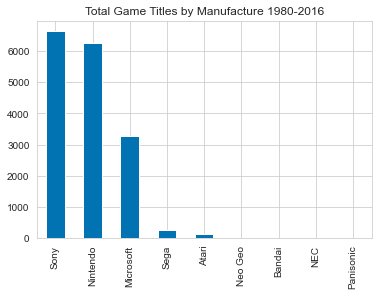

<IPython.core.display.Javascript object>

In [20]:
vgd['Manufacturer'].value_counts().plot(kind='bar', title='Total Game Titles by Manufacture 1980-2016')

<AxesSubplot:title={'center':'Total Global Sales per Platform Manufacturer (in Million USD) 1980-2016'}, xlabel='Manufacturer'>

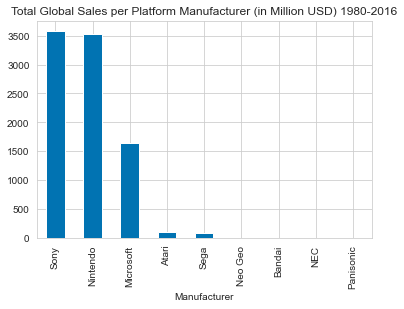

<IPython.core.display.Javascript object>

In [21]:
vgd.groupby('Manufacturer')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Global Sales per Platform Manufacturer (in Million USD) 1980-2016')

<AxesSubplot:title={'center':'Total Game Titles by Platform Type 1980-2016'}>

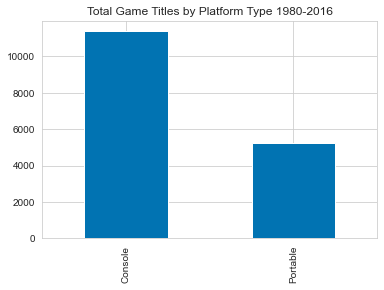

<IPython.core.display.Javascript object>

In [22]:
vgd['Platform_Type'].value_counts().plot(kind='bar', title='Total Game Titles by Platform Type 1980-2016')

<AxesSubplot:title={'center':'Total Global Sales per Platform Type (in Million USD) 1980-2016'}, xlabel='Platform_Type'>

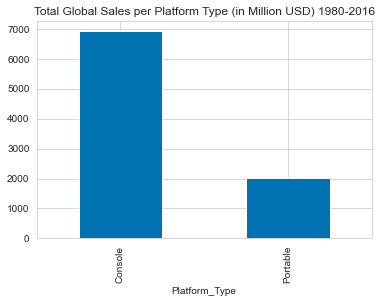

<IPython.core.display.Javascript object>

In [23]:
vgd.groupby('Platform_Type')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Global Sales per Platform Type (in Million USD) 1980-2016')

<AxesSubplot:title={'center':'Total Global Sales per Platform Type 1980-2016'}, xlabel='Manufacturer,Platform_Type'>

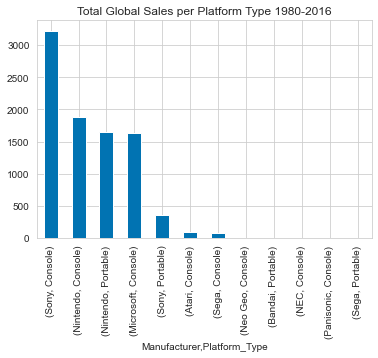

<IPython.core.display.Javascript object>

In [24]:
vgd.groupby(['Manufacturer', 'Platform_Type'])['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Global Sales per Platform Type 1980-2016')

#### Drop all observations with missing values. 

In [25]:
vgd.index.size

16598

<IPython.core.display.Javascript object>

In [26]:
vgd=vgd.dropna()

<IPython.core.display.Javascript object>

In [27]:
vgd.index.size

16328

<IPython.core.display.Javascript object>

#### Drop Years 2017 and 2020.
The data is unreliable in these years are incomplete and inconsistent with the range of the dataset. They will cause issues with the final visualization and will be removed from the dataset to create a cleaner bar graph race.

In [28]:
drop_list=[]

<IPython.core.display.Javascript object>

In [29]:
vgd[vgd['Year']==2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Manufacturer,Platform_Type
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03,Sony,Console
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01,Sony,Portable
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01,Sony,Portable


<IPython.core.display.Javascript object>

In [30]:
drop_list=(vgd.loc[vgd['Year']==2017].index.tolist())

<IPython.core.display.Javascript object>

In [31]:
drop_list

[14390, 16241, 16438]

<IPython.core.display.Javascript object>

In [32]:
vgd[vgd['Year']==2020]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Manufacturer,Platform_Type
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,Nintendo,Portable


<IPython.core.display.Javascript object>

In [33]:
drop_list = drop_list  + vgd.loc[vgd['Year']==2020].index.tolist()
drop_list

[14390, 16241, 16438, 5957]

<IPython.core.display.Javascript object>

In [34]:
vgd=vgd.drop(drop_list, axis=0)

<IPython.core.display.Javascript object>

In [35]:
vgd.index.size

16324

<IPython.core.display.Javascript object>

In [36]:
vgd[vgd.duplicated()].count()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
Manufacturer     0
Platform_Type    0
dtype: int64

<IPython.core.display.Javascript object>

In [37]:
vgd[vgd['Name'].duplicated()].count()

Rank             4992
Name             4992
Platform         4992
Year             4992
Genre            4992
Publisher        4992
NA_Sales         4992
EU_Sales         4992
JP_Sales         4992
Other_Sales      4992
Global_Sales     4992
Manufacturer     4992
Platform_Type    4992
dtype: int64

<IPython.core.display.Javascript object>

#### Observation
There are 4965 observations that have the same name. Which makes sense with publishers releasing on multiple platforms over time. Looking at these games'total sales could be insightful.

In [38]:
vgd[vgd['Name'].duplicated()].groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head()

Name
Grand Theft Auto V                34.52
Call of Duty: Ghosts              17.17
Call of Duty: Black Ops           16.39
Call of Duty: Modern Warfare 3    16.07
Call of Duty: Black Ops II        15.69
Name: Global_Sales, dtype: float64

<IPython.core.display.Javascript object>

In [39]:
vgd.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Manufacturer,Platform_Type
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,Console
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,Console
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Console
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,Console
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,Portable
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Nintendo,Portable
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo,Portable
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Nintendo,Console
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Nintendo,Console
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo,Console


<IPython.core.display.Javascript object>

#### Observation

Like it or not, Grand Theft Auto V is one of the most successful titles of all time. While many Nintendo games were platform specific, when comparing other modern multiplatform games, GTA V's global sales figures put it in 4th place overall!

#### Objects ought to be made categorical variables for analysis.

In [40]:
vgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           16324 non-null  int64  
 1   Name           16324 non-null  object 
 2   Platform       16324 non-null  object 
 3   Year           16324 non-null  float64
 4   Genre          16324 non-null  object 
 5   Publisher      16324 non-null  object 
 6   NA_Sales       16324 non-null  float64
 7   EU_Sales       16324 non-null  float64
 8   JP_Sales       16324 non-null  float64
 9   Other_Sales    16324 non-null  float64
 10  Global_Sales   16324 non-null  float64
 11  Manufacturer   16324 non-null  object 
 12  Platform_Type  16324 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.7+ MB


<IPython.core.display.Javascript object>

In [41]:
columns=vgd.columns.tolist()
columns

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Manufacturer',
 'Platform_Type']

<IPython.core.display.Javascript object>

In [42]:
object_type_list=[]

for i in range (0, len(columns)):
    if vgd[columns[i]].dtype == object:
        object_type_list.append(columns[i])

object_type_list

['Name', 'Platform', 'Genre', 'Publisher', 'Manufacturer', 'Platform_Type']

<IPython.core.display.Javascript object>

In [43]:
for col in object_type_list:
    vgd[col] = vgd[col].astype('category')

<IPython.core.display.Javascript object>

In [44]:
vgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Rank           16324 non-null  int64   
 1   Name           16324 non-null  category
 2   Platform       16324 non-null  category
 3   Year           16324 non-null  float64 
 4   Genre          16324 non-null  category
 5   Publisher      16324 non-null  category
 6   NA_Sales       16324 non-null  float64 
 7   EU_Sales       16324 non-null  float64 
 8   JP_Sales       16324 non-null  float64 
 9   Other_Sales    16324 non-null  float64 
 10  Global_Sales   16324 non-null  float64 
 11  Manufacturer   16324 non-null  category
 12  Platform_Type  16324 non-null  category
dtypes: category(6), float64(6), int64(1)
memory usage: 1.5 MB


<IPython.core.display.Javascript object>

In [45]:
num_cols=vgd.describe().columns.tolist()
cat_cols=vgd.describe(exclude='number').columns.tolist()

<IPython.core.display.Javascript object>

In [46]:
num_cols

['Rank',
 'Year',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

<IPython.core.display.Javascript object>

In [47]:
cat_cols

['Name', 'Platform', 'Genre', 'Publisher', 'Manufacturer', 'Platform_Type']

<IPython.core.display.Javascript object>

Platform
PS2     2135
DS      2130
PS3     1306
Wii     1298
X360    1237
PSP     1200
PS      1190
PC       939
XB       806
GBA      787
GC       544
3DS      499
PSV      408
PS4      335
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     120
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64



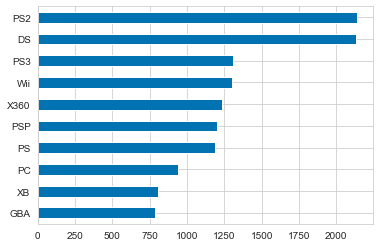



Genre
Action          3257
Sports          2323
Misc            1690
Role-Playing    1468
Shooter         1285
Adventure       1276
Racing          1226
Platform         876
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64



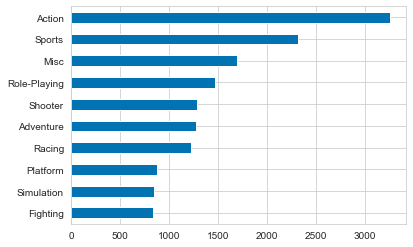



Publisher
Electronic Arts                 1349
Activision                       969
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     825
                                ... 
Ertain                             1
Epic Games                         1
Seventh Chord                      1
Enjoy Gaming ltd.                  1
MLB.com                            1
Name: Publisher, Length: 576, dtype: int64



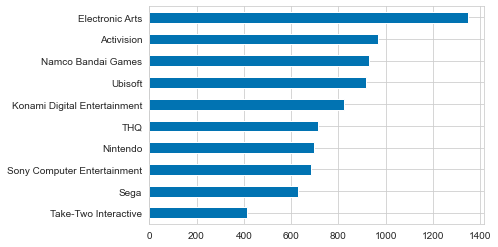



Manufacturer
Sony         6574
Nintendo     6152
Microsoft    3195
Sega          259
Atari         120
Neo Geo        12
Bandai          6
NEC             3
Panisonic       3
Name: Manufacturer, dtype: int64



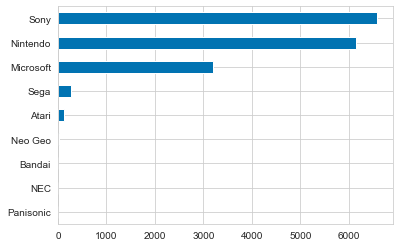

<IPython.core.display.Javascript object>

In [48]:
for i in range(1, len(cat_cols)-1):
    print(cat_cols[i])
    print(vgd[cat_cols[i]].value_counts())
    print()
    vgd[cat_cols[i]].value_counts()[:10].plot(kind='barh').invert_yaxis() #plots top 10 only
    plt.show()
    print("\n")

#### Observation

* In terms of purely units of game titles sold:
1. Sony just eeks out Nintendo, with both selling over 6,000+ titles.
2. Nintendo DS, followed by the Sony Playstation 2, have sold the most game titles at over 2,000 titles each.
3. Electronic Arts has sold the most number of titles, likely due to non-platform specific production.
4. Action and Sports genres have the widest appeal.

### Timeline of console releases with the game sales.

<!-- 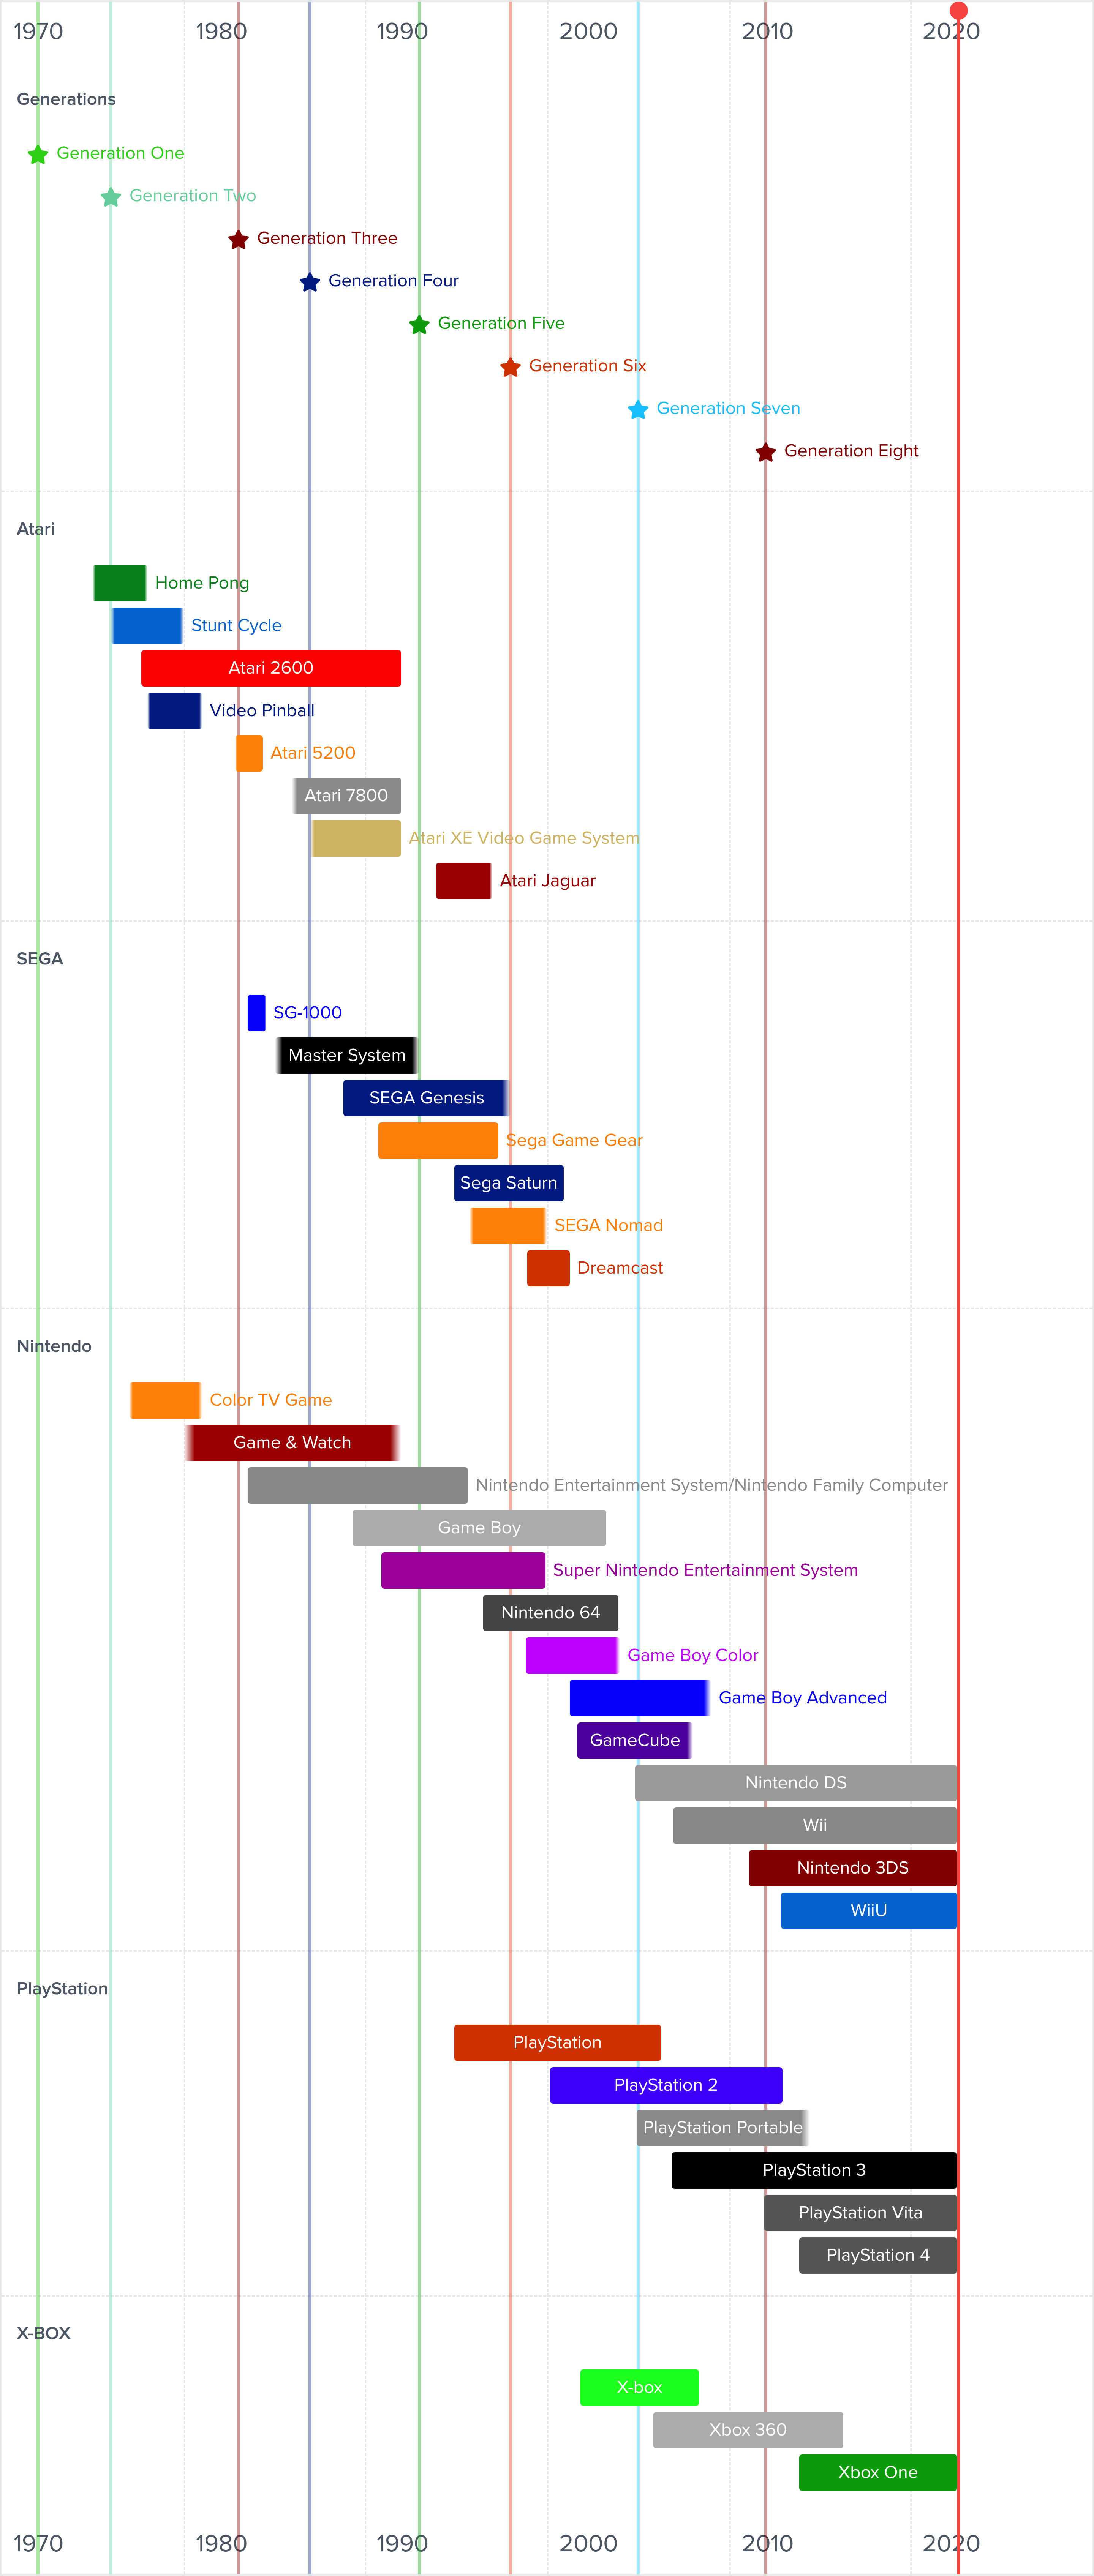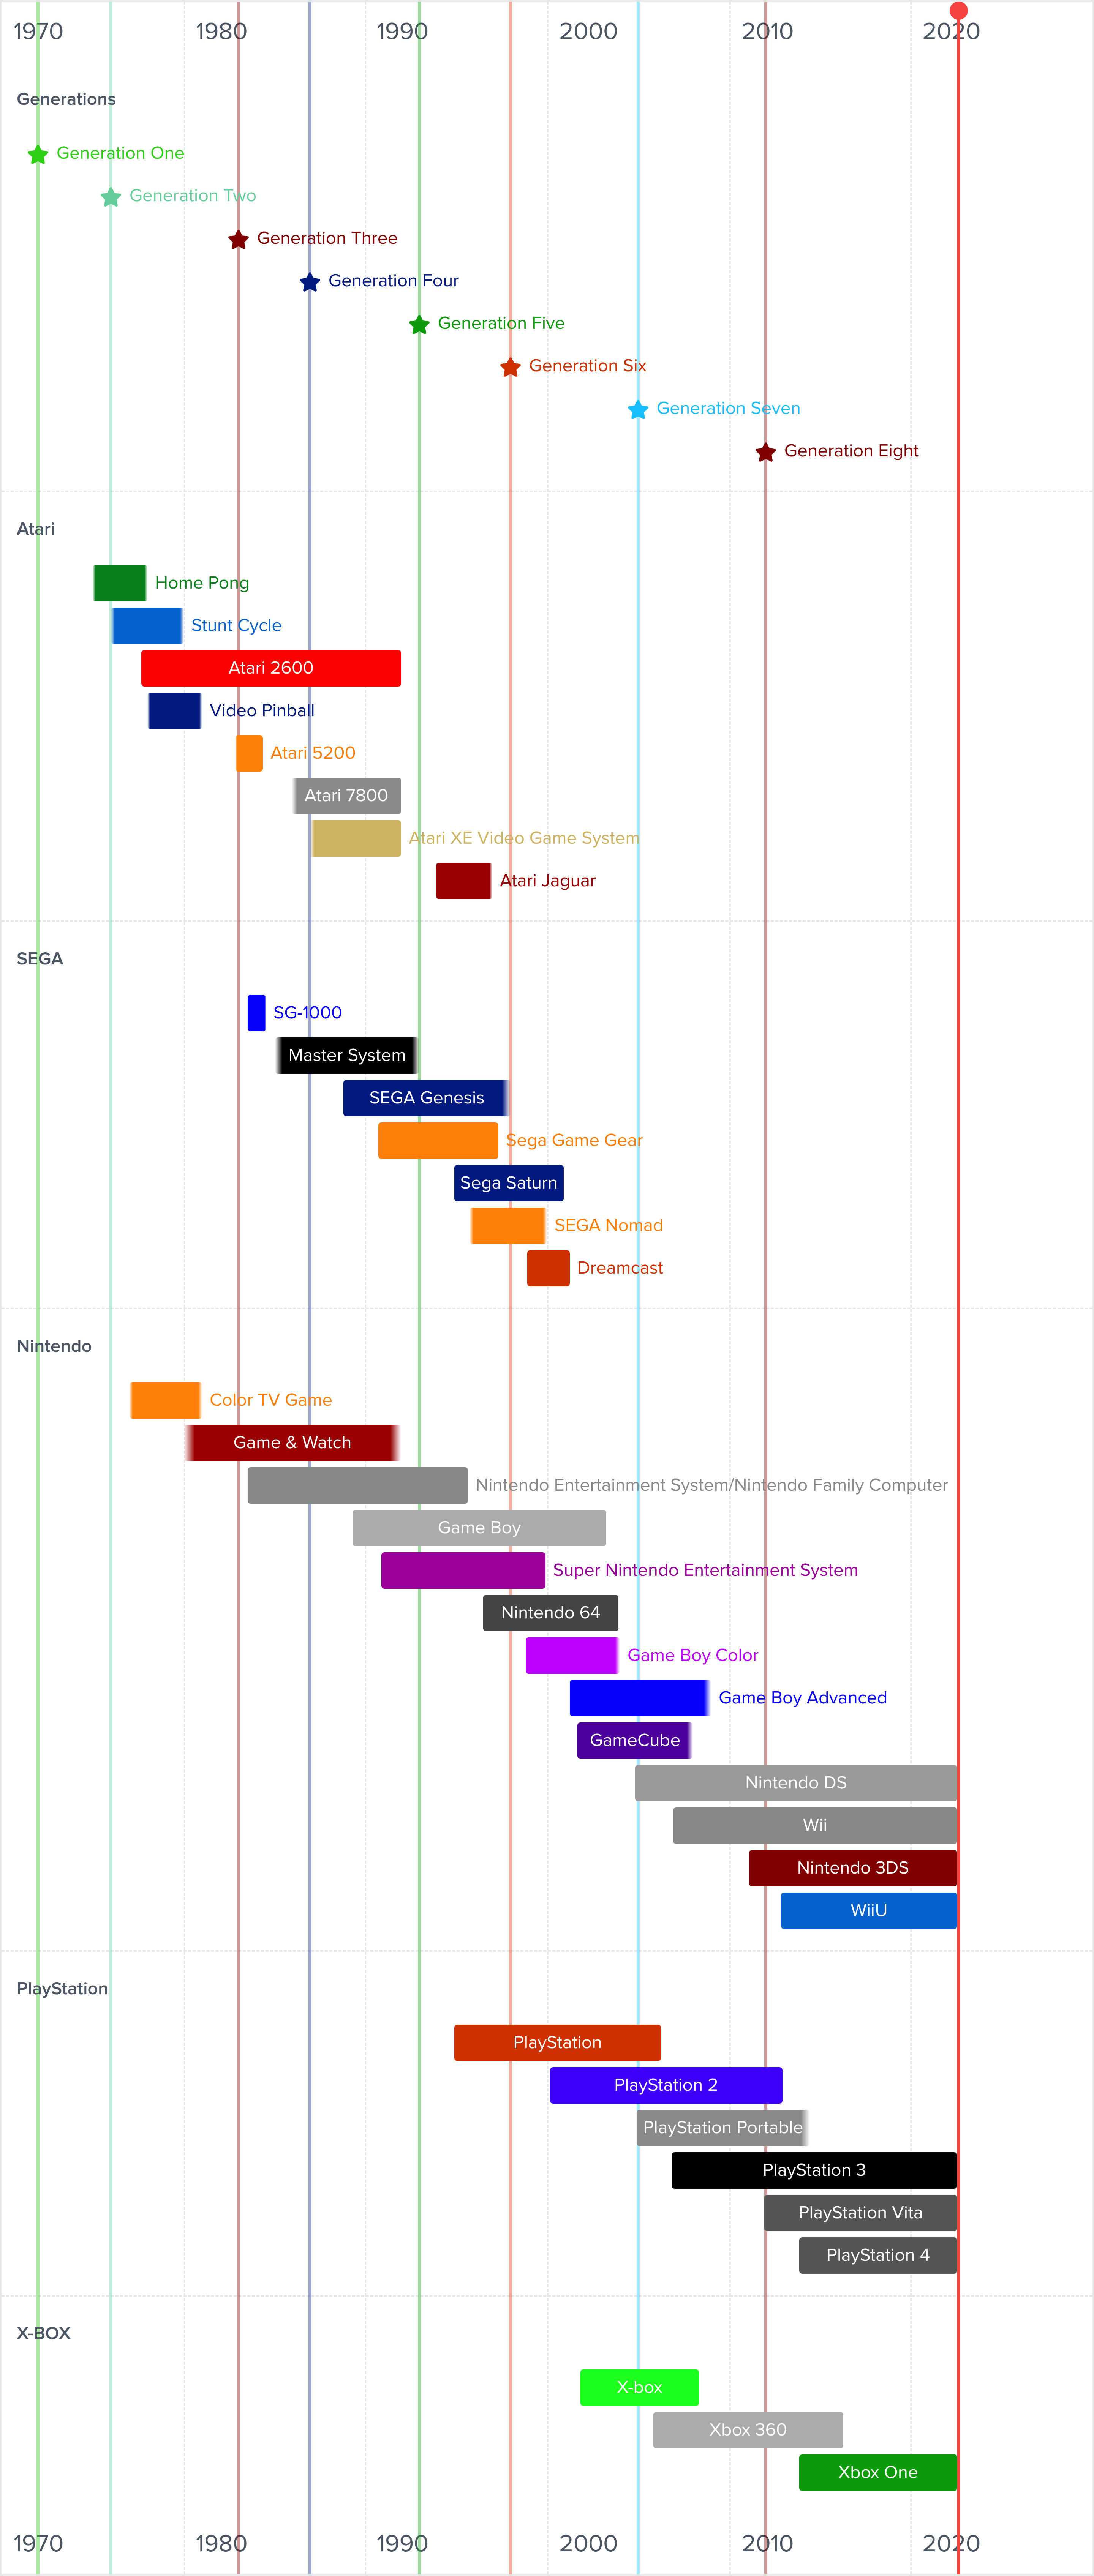 -->
<img src="history_of_video_game_consoles (2).png" alt="Platform Timeline" width="720"/>
Image Source: www.preceden.com

#### Platform

In [49]:
vgd.groupby('Platform')[num_cols[2:]].sum().sort_values(by='Global_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,579.97,336.46,137.59,192.43,1246.31
X360,597.28,278.60,12.31,84.99,973.49
PS3,389.89,341.08,79.21,141.09,951.23
Wii,505.60,267.87,68.28,80.38,922.74
DS,388.26,194.05,175.02,60.27,818.62
PS,335.29,212.78,139.78,40.76,728.43
GBA,180.58,72.67,46.56,7.58,308.01
PSP,108.47,67.98,76.15,42.01,294.66
PS4,96.80,123.70,14.27,43.36,278.07


<IPython.core.display.Javascript object>

#### Observation

1. The Playstation 2 has profited the most with nearly 1.25 billion in game sales alone.
2. The 7th Generation consoles (PS3, Wii, and XB360) follow with just hy of 1 billion in games sales each.
3. The top portable game device of all time, the Nintendo DS, has a respectable 800+ million in games sales, followed by the Sony PSP.

In [50]:
list_of_years=sorted(vgd['Year'].unique().tolist())

<IPython.core.display.Javascript object>

In [51]:

# for year in list_of_years:
#     print(year)
#     print(vgd[vgd['Year']==year].groupby('Platform')[num_cols[2:]].sum().sort_values(by='Global_Sales', ascending=False)[:10].reset_index())

<IPython.core.display.Javascript object>

In [52]:
# for year in list_of_years:
#     print(year)
#     print(vgd[vgd['Year']==year].groupby('Platform')[num_cols[6]].sum().sort_values(ascending=False)[:10].reset_index())

<IPython.core.display.Javascript object>

In [53]:
# for year in list_of_years:
#     print(year)
#     vgd[vgd['Year']==year].groupby('Platform')[num_cols[6]].sum().sort_values(ascending=False)[:10].plot(kind='bar')
#     plt.show()

<IPython.core.display.Javascript object>

#### Manufacturer

In [54]:
vgd.groupby('Manufacturer')[num_cols[2:]].sum().sort_values(by='Global_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Manufacturer,,,,,
Sony,1526.49,1098.27,467.84,468.06,3560.28
Nintendo,1763.77,784.64,755.37,193.42,3500.26
Microsoft,956.75,522.50,14.20,130.05,1625.10
Atari,86.00,5.18,0.00,0.90,92.16
Sega,26.42,8.11,43.98,1.28,79.83
Neo Geo,0.00,0.00,1.44,0.00,1.44
Bandai,0.00,0.00,1.42,0.00,1.42
NEC,0.00,0.00,0.19,0.00,0.19
Panisonic,0.00,0.00,0.10,0.00,0.10


<IPython.core.display.Javascript object>

#### Observation

** NOTE: This does not account for platform sales, network subscriptions, microtransactions (downloadable content), or any other additional revenue streams the respective manufacturer earned over this time period. **

In [55]:
list_of_years=sorted(vgd['Year'].unique().tolist())

<IPython.core.display.Javascript object>

In [56]:
# for year in list_of_years:
#     print(year)
#     print(vgd[vgd['Year']==year].groupby('Manufacturer')[num_cols[2:]].sum().sort_values(by='Global_Sales', ascending=False)[:10].reset_index())

<IPython.core.display.Javascript object>

In [57]:
# for year in list_of_years:
#     print(year)
#     print(vgd[vgd['Year']==year].groupby('Manufacturer')[num_cols[6]].sum().sort_values(ascending=False)[:10].reset_index())

<IPython.core.display.Javascript object>

In [58]:
# for year in list_of_years:
#     print(year)
#     vgd[vgd['Year']==year].groupby('Manufacturer')[num_cols[6]].sum().sort_values(ascending=False)[:10].plot(kind='bar')
#     plt.show()

<IPython.core.display.Javascript object>

#### Validation Checks and Test Code

In [59]:
vgd.groupby('Platform').get_group('PS2')['Global_Sales'].cumsum()

17         20.81
24         36.96
28         51.94
38         65.04
47         76.70
          ...   
16559    1246.27
16561    1246.28
16572    1246.29
16580    1246.30
16595    1246.31
Name: Global_Sales, Length: 2135, dtype: float64

<IPython.core.display.Javascript object>

In [60]:
vgd.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)[:10]

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           31.03
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Name: Global_Sales, dtype: float64

<IPython.core.display.Javascript object>

In [61]:
vgd.groupby('Platform').get_group('PS')[['Name', 'Global_Sales']][:10].sort_values(by='Global_Sales', ascending=False)

,Name,Global_Sales
52,Gran Turismo,10.95
66,Final Fantasy VII,9.72
69,Gran Turismo 2,9.49
87,Final Fantasy VIII,7.86
95,Crash Bandicoot 2: Cortex Strikes Back,7.58
105,Tekken 3,7.16
106,Crash Bandicoot 3: Warped,7.13
116,Crash Bandicoot,6.82
138,Driver,6.27
145,Metal Gear Solid,6.03


<IPython.core.display.Javascript object>

In [62]:
vgd.groupby('Genre').get_group('Sports')[['Name', 'Global_Sales']][:10].sort_values(by='Global_Sales', ascending=False)

,Name,Global_Sales
0,Wii Sports,82.74
3,Wii Sports Resort,33.00
13,Wii Fit,22.72
14,Wii Fit Plus,22.00
77,FIFA 16,8.49
85,Mario & Sonic at the Olympic Games,8.06
112,FIFA 14,6.90
117,Zumba Fitness,6.81
121,FIFA 12,6.69
124,FIFA 15,6.59


<IPython.core.display.Javascript object>

#### Observation

Some games, especially Sports, are part of a franchise series that publishes a game every year. These could be considered one game that generates revenue over time.

In [98]:
vgd[vgd['Name'].str.contains('Madden')].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Manufacturer,Platform_Type
179,180,Madden NFL 2004,PS2,2004.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,Sony,Console
211,212,Madden NFL 06,PS2,2005.0,Sports,Electronic Arts,3.98,0.26,0.01,0.66,4.91,Sony,Console
238,239,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53,Sony,Console
240,241,Madden NFL 07,PS2,2006.0,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49,Sony,Console
279,280,Madden NFL 2003,PS2,2002.0,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14,Sony,Console


<IPython.core.display.Javascript object>

In [99]:
vgd[vgd['Name'].str.contains('FIFA')].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Manufacturer,Platform_Type
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,Sony,Console
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24,Sony,Console
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,Sony,Console
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69,Sony,Console
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59,Sony,Console


<IPython.core.display.Javascript object>

In [96]:
print("FIFA franchise global sales: " + str(vgd[vgd['Name'].str.contains('FIFA')]['Global_Sales'].sum()))
print("MADDEN franchise global sales: " + str(vgd[vgd['Name'].str.contains('Madden')]['Global_Sales'].sum()))

FIFA franchise global sales: 174.84999999999997
MADDEN franchise global sales: 123.58


<IPython.core.display.Javascript object>

#### Observation

The total global sales from these two famous franchises are considerable.

In [63]:
# rewrite this code to run for each platform.
#create separate dataframes for each platforms top games using groupby functions

# rdf=vgd[['Name', 'Year', 'Global_Sales']]
# rdf1=rdf.pivot_table(values = 'Global_Sales',index = 'Year', columns = 'Name', aggfunc='sum')
# rdf1.fillna(0, inplace=True)
# rdf1.sort_values(list(rdf1.columns), inplace=True)
# rdf1=rdf1.sort_index()
# rdf2=rdf1.cumsum()
# bcr.bar_chart_race(df = rdf2, 
#                    n_bars = 10, 
#                    sort='desc',
#                    fixed_max=False,
#                    steps_per_period=20,
#                    period_length=800,
#                    label_bars=True)

<IPython.core.display.Javascript object>

# PART I

# Bar Chart Race Library

In [64]:
race_df=vgd[['Year', 'Platform', 'Global_Sales', 'Manufacturer', 'Genre']]
race_df.shape

(16324, 5)

<IPython.core.display.Javascript object>

## Top Platform Comparison over Time

### Cummulative sum of each platform

In [65]:
race_df1 = race_df.pivot_table(values = 'Global_Sales',index = 'Year', columns = 'Platform', aggfunc='sum')
race_df1.fillna(0, inplace=True)
race_df1.sort_values(list(race_df1.columns), inplace=True)
race_df1=race_df1.sort_index()
race_df2=race_df1.cumsum()
# race_df2

<IPython.core.display.Javascript object>

### Bar Chart Race: Top Platforms 1980-2016

In [66]:
bcr.bar_chart_race(df = race_df2, 
                   n_bars = 10, 
                   sort='desc',
                   fixed_max=False,
                   steps_per_period=20,
                   period_length=800,
                   label_bars=True,
                   title='Top Video Game Platforms by Global Game Sales 1980-2016',
                   filename = 'vg_platforms.mp4')

<IPython.core.display.Javascript object>

## Top Manufacturer Comparison over Time

### Cummulative sum of each manufcturer

In [67]:
race_df3 = race_df.pivot_table(values = 'Global_Sales',index = ['Year'], columns = 'Manufacturer', aggfunc='sum')
race_df3.fillna(0, inplace=True)
race_df3.sort_values(list(race_df3.columns), inplace=True)
race_df3=race_df3.sort_index()
race_df4=race_df3.cumsum()
# race_df4

<IPython.core.display.Javascript object>

### Bar Chart Race: Top Manufacturers 1980-2016

In [68]:
bcr.bar_chart_race(df = race_df4, 
                   n_bars = 10, 
                   sort='desc',
                   fixed_max=False,
                   steps_per_period=20,
                   period_length=800,
                   label_bars=True,
                   title='Top Video Game Manufacturers by Global Game Sales 1980-2016',
                   filename = 'vg_manufacturers.mp4')

<IPython.core.display.Javascript object>

## Top Genre Comparison over Time

### Cummulative sum of each genre

In [69]:
race_df5 = race_df.pivot_table(values = 'Global_Sales',index = ['Year'], columns = 'Genre', aggfunc='sum')
race_df5.fillna(0, inplace=True)
race_df5.sort_values(list(race_df5.columns), inplace=True)
race_df5=race_df5.sort_index()
race_df6=race_df5.cumsum()
# race_df6

<IPython.core.display.Javascript object>

### Bar Chart Race: Top Genres 1980-2016

In [70]:
bcr.bar_chart_race(df = race_df6, 
                   n_bars = 10, 
                   sort='desc',
                   fixed_max=False,
                   steps_per_period=20,
                   period_length=800,
                   label_bars=True,
                   title='Top Video Game Genres by Global Game Sales 1980-2016',
                   filename = 'vg_genres.mp4')

<IPython.core.display.Javascript object>

## Top Consoles and Top Portables

In [71]:
race_df=vgd[['Year', 'Platform', 'Global_Sales', 'Manufacturer', 'Genre', 'Platform_Type']]
race_df.shape

(16324, 6)

<IPython.core.display.Javascript object>

In [72]:
console_vgd=vgd[vgd['Platform_Type']=='Console']
console_vgd.shape

(11195, 13)

<IPython.core.display.Javascript object>

In [73]:
portable_vgd=vgd[vgd['Platform_Type']=='Portable']
portable_vgd.shape

(5129, 13)

<IPython.core.display.Javascript object>

### Cummulative sum of each console

In [74]:
race_df7 = console_vgd.pivot_table(values = 'Global_Sales',index = ['Year'], columns = 'Platform', aggfunc='sum')
race_df7.fillna(0, inplace=True)
race_df7.sort_values(list(race_df7.columns), inplace=True)
race_df7=race_df7.sort_index()
race_df8=race_df7.cumsum()
# race_df8

<IPython.core.display.Javascript object>

### Bar Chart Race: Top Consoles 1980-2016

In [75]:
bcr.bar_chart_race(df = race_df8, 
                   n_bars = 10, 
                   sort='desc',
                   fixed_max=False,
                   steps_per_period=20,
                   period_length=800,
                   label_bars=True,
                   title='Top Video Game Consoles by Global Game Sales 1980-2016',
                   filename = 'vg_consoles.mp4')

<IPython.core.display.Javascript object>

#### Observation

The NES dominated the 1980s, creating in insurmountable monopoly on home video entertainment. The legacy of which has secured the system a place in the hearts of families around the world. It appears the true console wars didn't kick into full swing until the 1990's when the SNES (Super Nintendo Entertainment System) and GEN (SEGA Genesis) duked it out for the next decade of console dominance. That is, of course, until Sony entered the scene with the PS (PlayStation). All the while, the silent stalwart of the PC gaming community continued to grow. 

### Cummulative sum of each portable

In [76]:
race_df9 = portable_vgd.pivot_table(values = 'Global_Sales',index = ['Year'], columns = 'Platform', aggfunc='sum')
race_df9.fillna(0, inplace=True)
race_df9.sort_values(list(race_df9.columns), inplace=True)
race_df9=race_df9.sort_index()
race_df10=race_df9.cumsum()
# race_df10

<IPython.core.display.Javascript object>

### Bar Chart Race: Top Portables 1980-2016

In [77]:
bcr.bar_chart_race(df = race_df10, 
                   n_bars = 10, 
                   sort='desc',
                   fixed_max=False,
                   steps_per_period=20,
                   period_length=800,
                   label_bars=True,
                   title='Top Video Game Portables by Global Game Sales 1980-2016',
                   filename = 'vg_portables.mp4')

<IPython.core.display.Javascript object>

#### Observation

The GB, like it's console brother the NES, enjoyed an era free from competition, amassing unforseen global mass-market appeal. Nintendo yet again cornered the market and capitalized on the Game Boy's success, followed by its own GBA, and DS handheld system. Despite Sony's wildly successful PSP and less successful PS Vita, Nintendo would continue to dominate the portable gaming market even to this day, with its 3DS and hybrid Switch systems.

## Key Takeaway
It is undeniable the power Ninetendo's monopoly of the 80s and ealry 90s had on total units sold. For nearly 10 years the NES went unchallenged in the market, with massive golbal sales figures never to be topped again. Why not? Well, as Sony and Microsoft entered the market, the console wars began, creating more competition and faster platform iteration and innovation. The NES and GameBoy gave Nintendo a massive head start, but let's look at the data from the 5th/6th generation consoles onward. **For the pupose of this analysis, 1990 will be considered the start of the console wars, with the SEGA Gensis and eventual Sony Platstaion entering the market to compete with the SNES amd fading NES from Nintendo.**

## The Console Wars - 1993-2016
The video game industry experiences its greatest diversity and competition in the 5th/6th generation of development. Let's examine the race to market share dominance during that period, from 1993 to 2016.

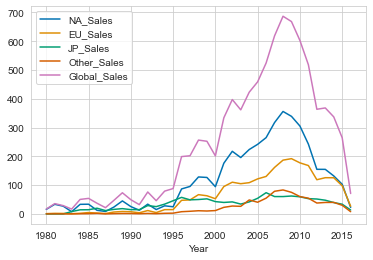

<IPython.core.display.Javascript object>

In [78]:
vgd[vgd['Global_Sales'] >= 0].groupby('Year')[num_cols[2:]].sum().sort_values(by='Year', ascending=False).plot()
plt.show()

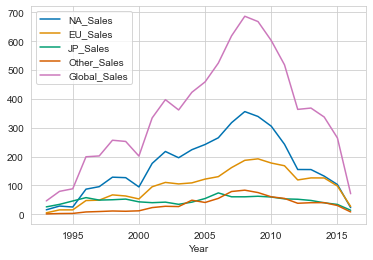

<IPython.core.display.Javascript object>

In [79]:
vgd[vgd['Year'] >= 1993].groupby('Year')[num_cols[2:]].sum().sort_values(by='Year', ascending=False).plot()
plt.show()

<!-- 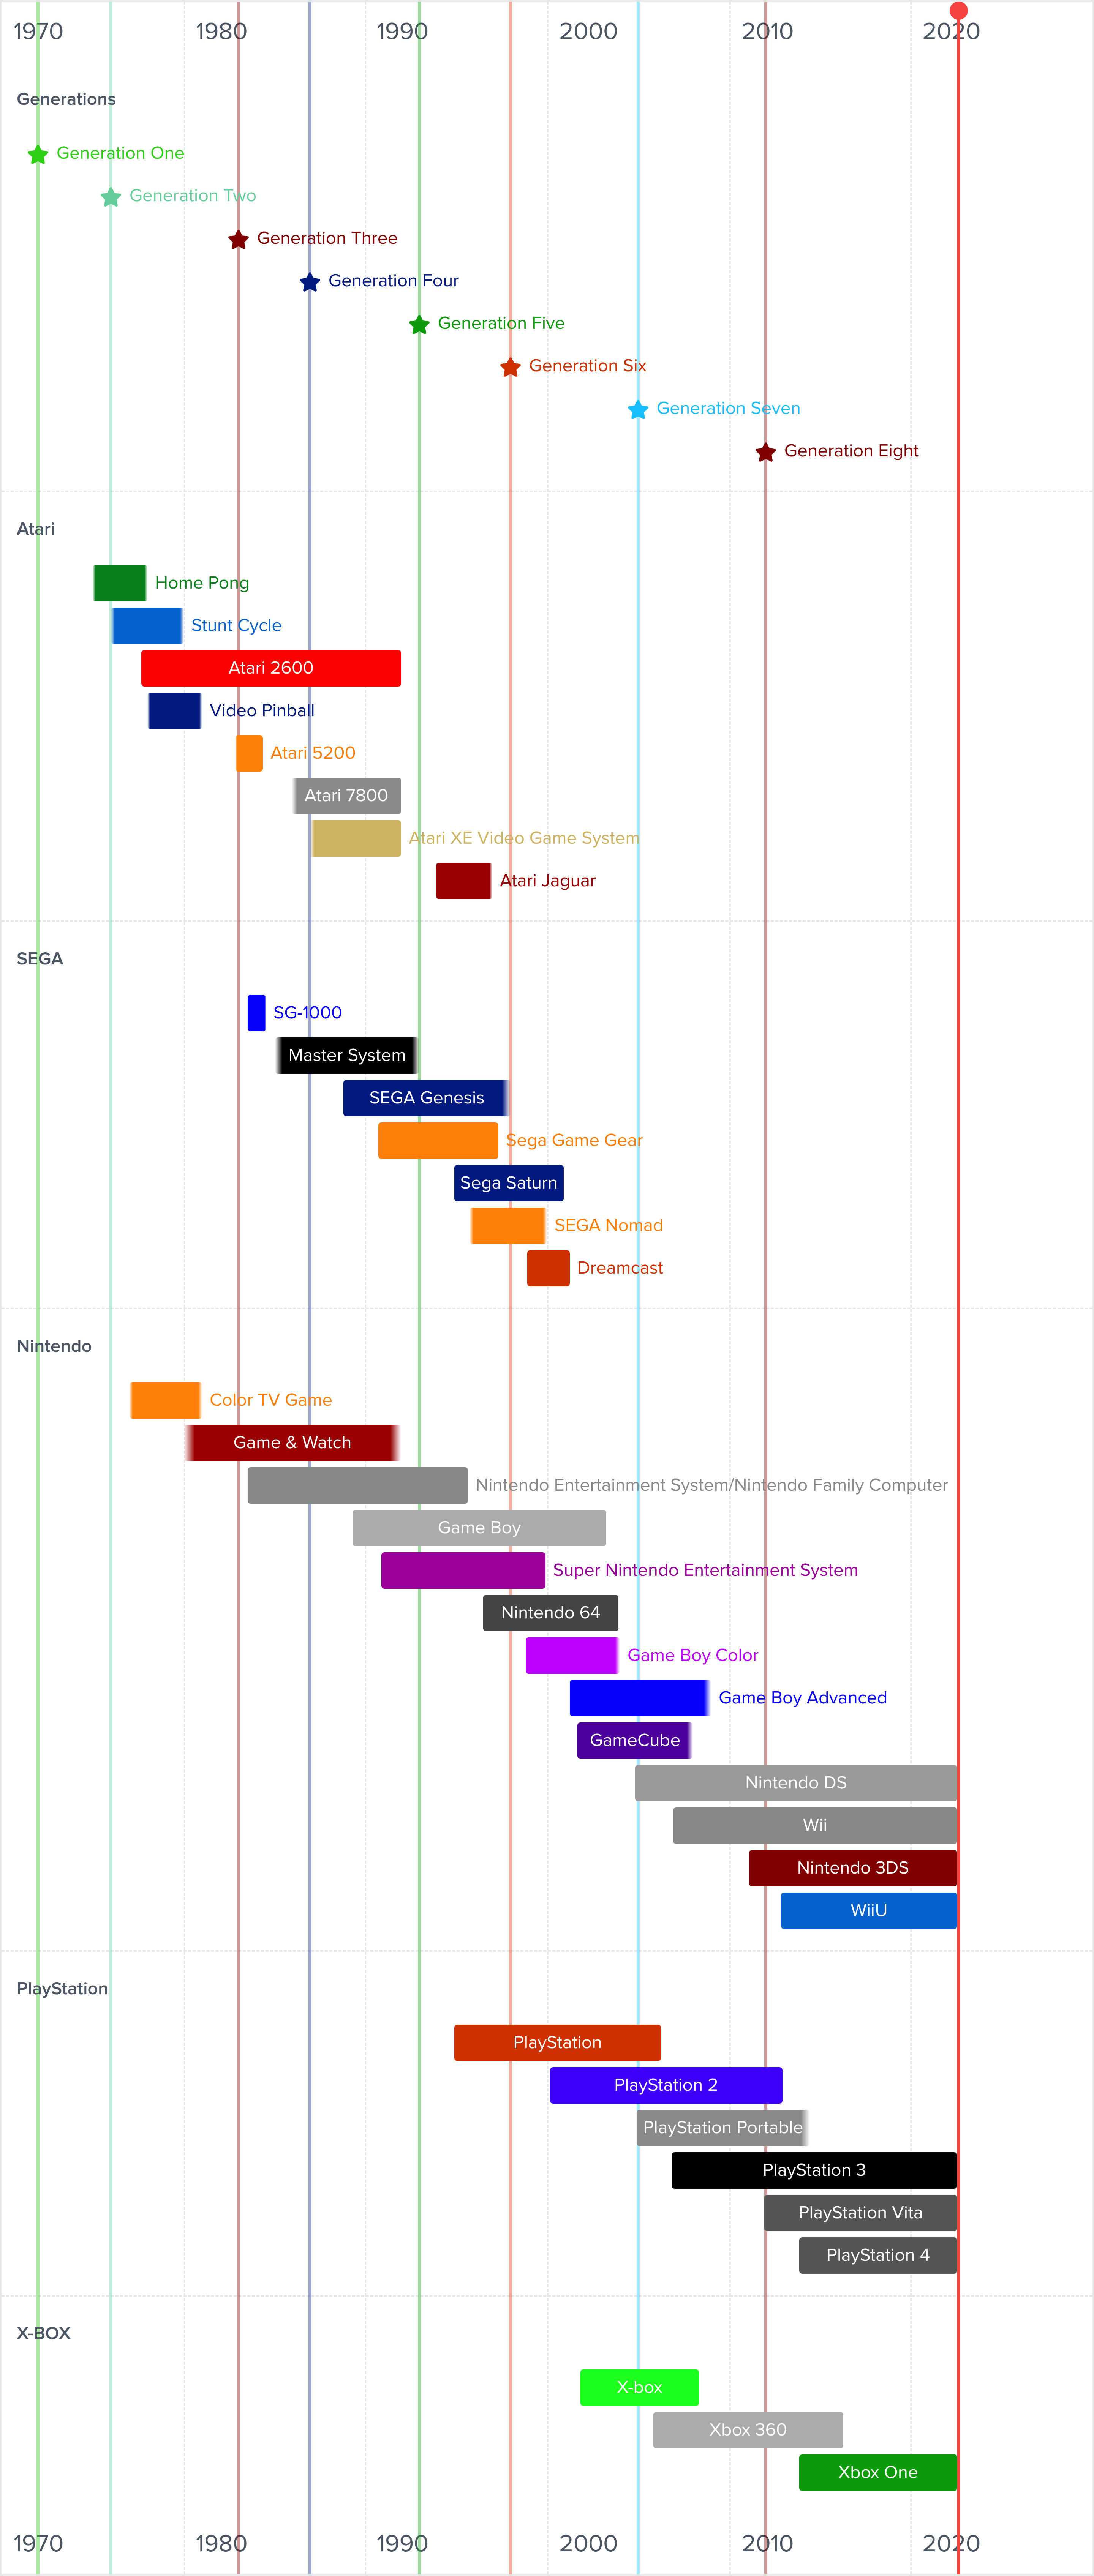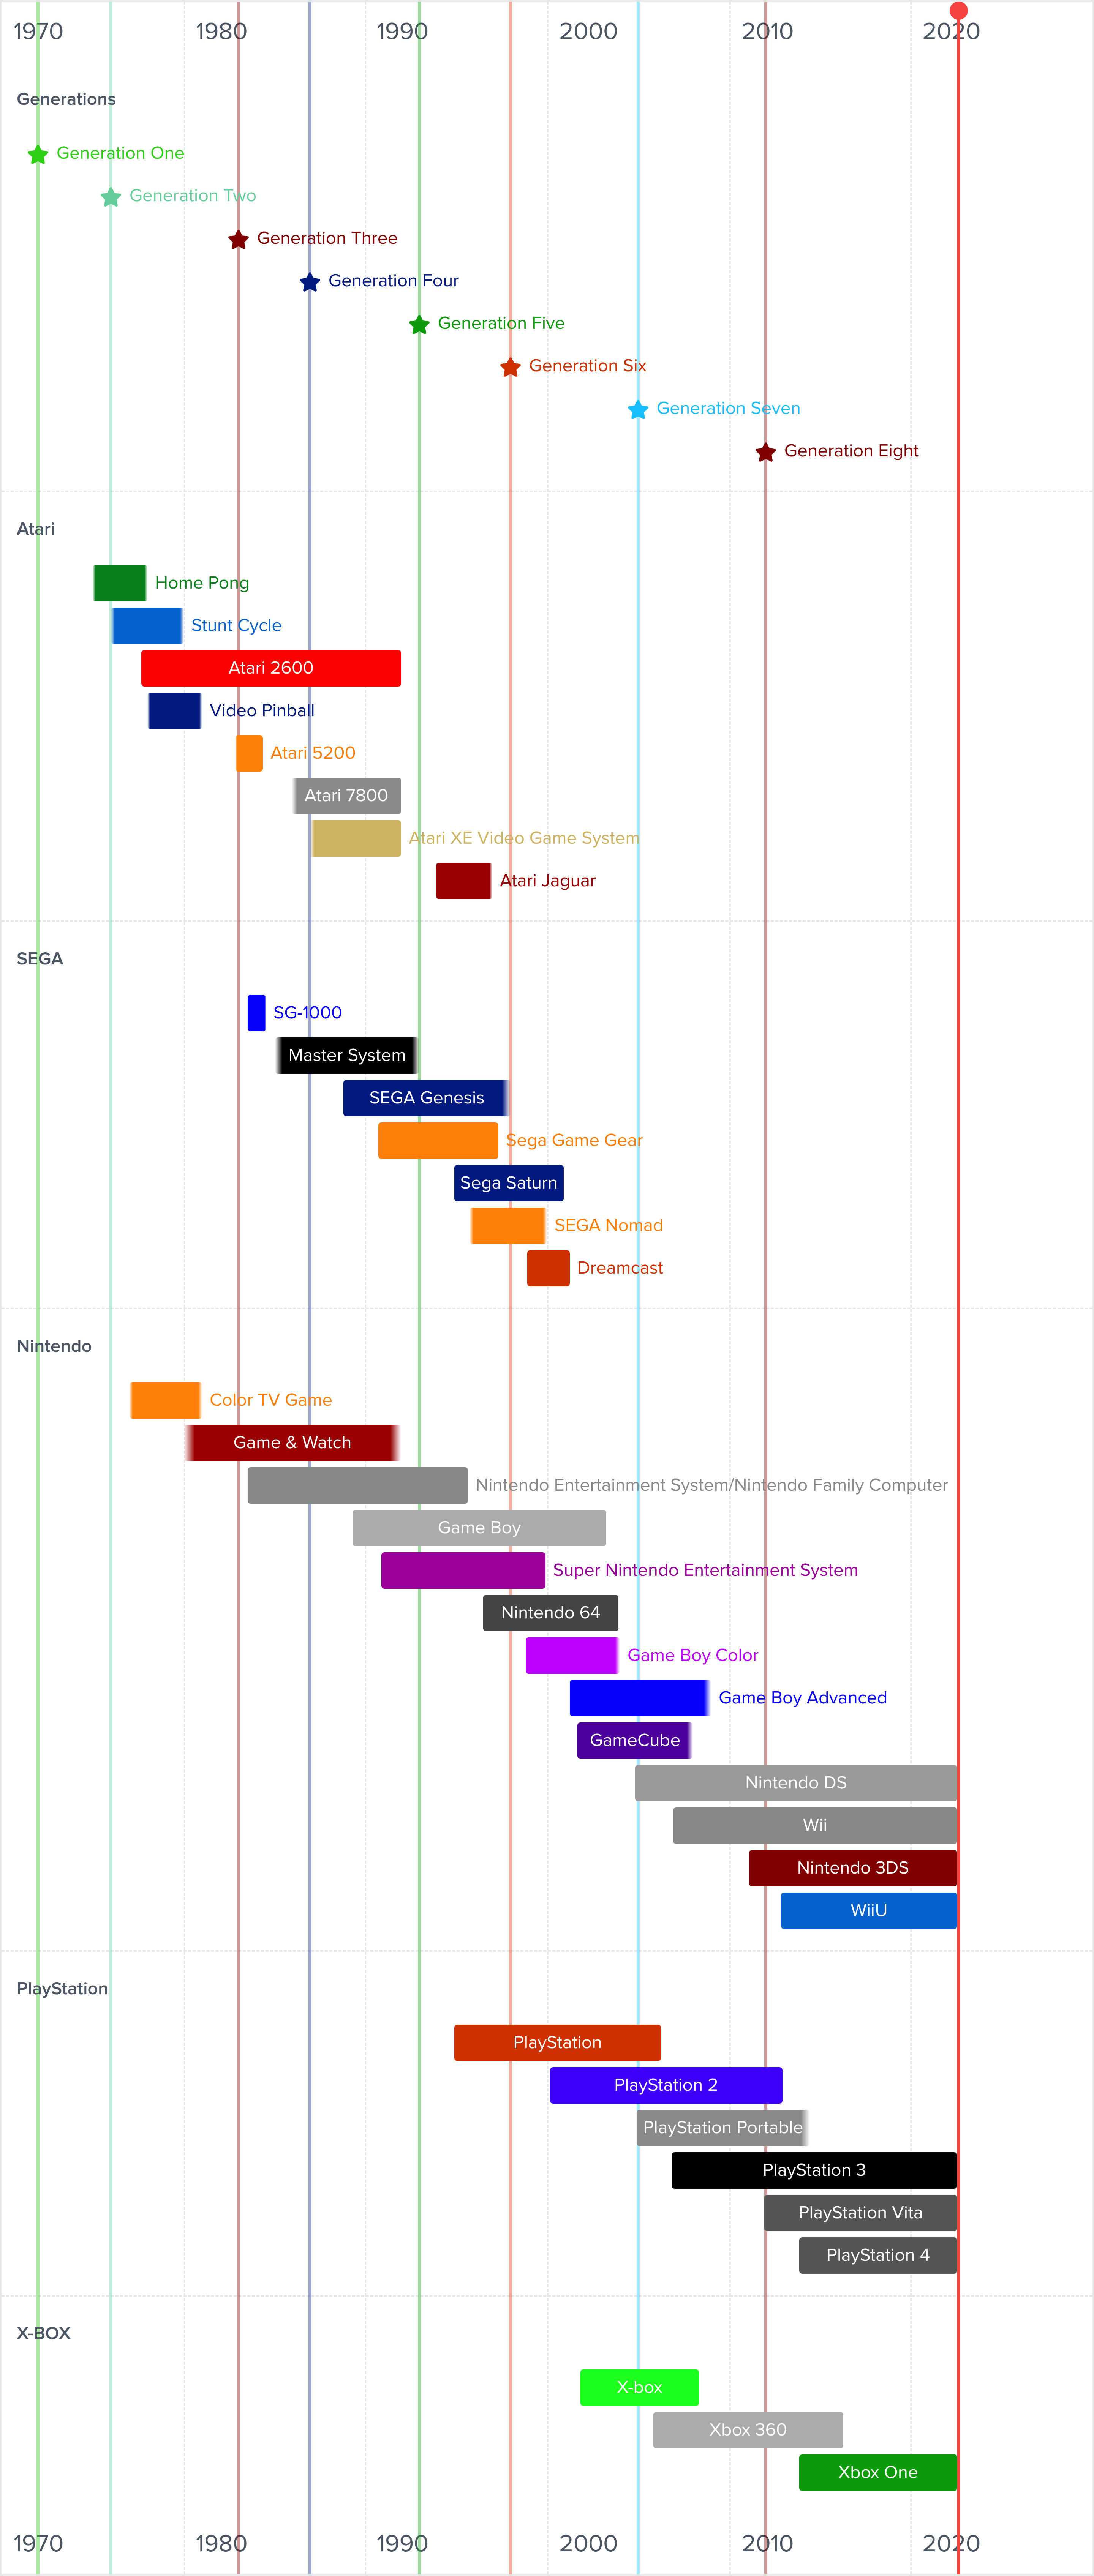 -->
<img src="history_of_video_game_consoles (2).png" alt="Platform Timeline" width="720"/>
Image Source: www.preceden.com

In [80]:
gen6=vgd[vgd['Year'] >= 1993] #end of the NES reign
gen6=gen6[gen6['Platform_Type'] == 'Console']

<IPython.core.display.Javascript object>

In [81]:
race_df11=gen6.pivot_table(values = 'Global_Sales',index = ['Year'], columns = 'Platform', aggfunc='sum')
race_df11.fillna(0, inplace=True)
race_df11.sort_values(list(race_df11.columns), inplace=True)
race_df11=race_df11.sort_index()
race_df12=race_df11.cumsum()
# race_df12

<IPython.core.display.Javascript object>

In [82]:
bcr.bar_chart_race(df = race_df12, 
                   n_bars = 10, 
                   sort='desc',
                   fixed_max=False,
                   steps_per_period=20,
                   period_length=800,
                   label_bars=True,
                   title='Top Video Game Platforms by Global Game Sales 1993-2016',
                   filename = 'vg_gen6.mp4')

<IPython.core.display.Javascript object>

## Final Note
What is amazing to see here is that whenever Nintendo enters the market with a new generation of console, they immediately dominate the market. Both the N64 and Wii skyrocket to the top when they launch. The nostalgia and name recognition from the NES success catapult any new game console from N64 and Wii, to the newest Switch console. (This dataset terminates around 2015/2016, and we just get to see the PS4 enter the market, but not the Xbox One or Nintendo Switch.)

# by: Kevin Leo Gallagher

Sources & Reference Citations

https://www.kaggle.com/datasets/gregorut/videogamesales

https://www.dexplo.org/bar_chart_race/

https://towardsdatascience.com/creating-bar-chart-race-animation-with-python-cdb01144074e

https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib

# To be continued... in Part II